Es el momento de hacer una buena exploración visual de los datos para entender un poquito mejor el dataset. Para ello trabajaremos con la librería matplotlib y seaborn.

##### Hipótesis
Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis.

¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?

¿Hay diferencias entre los paises en los ataques a hombres y mujeres?

¿Cuáles son las edades que más sufren ataques?

Independientemente de la edad, sufren los hombres más ataques que las mujeres?

¿En qué mes ocurren más ataques?

¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?

¿Cómo han evolucionado los ataques a lo largo del tiempo?

De todo esto, nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex. Reducimos esto a una tabla para saber qué tenemos ya limpito y qué no. Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I y II ya dejamos algunas columnas limpitas:
variable
¿Está limpia?

age
✔️ la limpiamos en el pair de Limpieza II

species
✔️ la limpiamos en el pair de Limpieza II

country
✔️ la limpiamos en el pair de Limpieza II

fatal
✔️ la limpiamos en el pair de Pandas V

year
✔️ es una columna de tipo float deberíamos convertirla a integer

sex
✔️ la limpiamos en el pair de Pandas V

fecha
✔️ la limpiamos en el pair de Pandas V


##### Objetivos
En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:

📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

pd.options.display.max_rows=None
plt.rcParams['figure.figsize']= (15,12)

2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:
* ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.


In [3]:
df= pd.read_csv('datos/attacks_limpieza_2.csv', index_col = 0)
df.head(1)

,case_number,year,type,country,area,location,activity,name,age,time,species_,href,date,month,fatal_y/n,sex_m_f
0,2018.06.25,2018,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57.0,18h00,white shark,http://sharkattackfile.net/spreadsheets/pdf_di...,25-Jun-2018,Jun,N,F


In [4]:
# ¿Tenemos nulos?
df.isnull().sum()

case_number      0
year             0
type             0
country         10
area            46
location        51
activity        31
name             9
age            158
time           160
species_         0
href             0
date             0
month          181
fatal_y/n       99
sex_m_f          0
dtype: int64

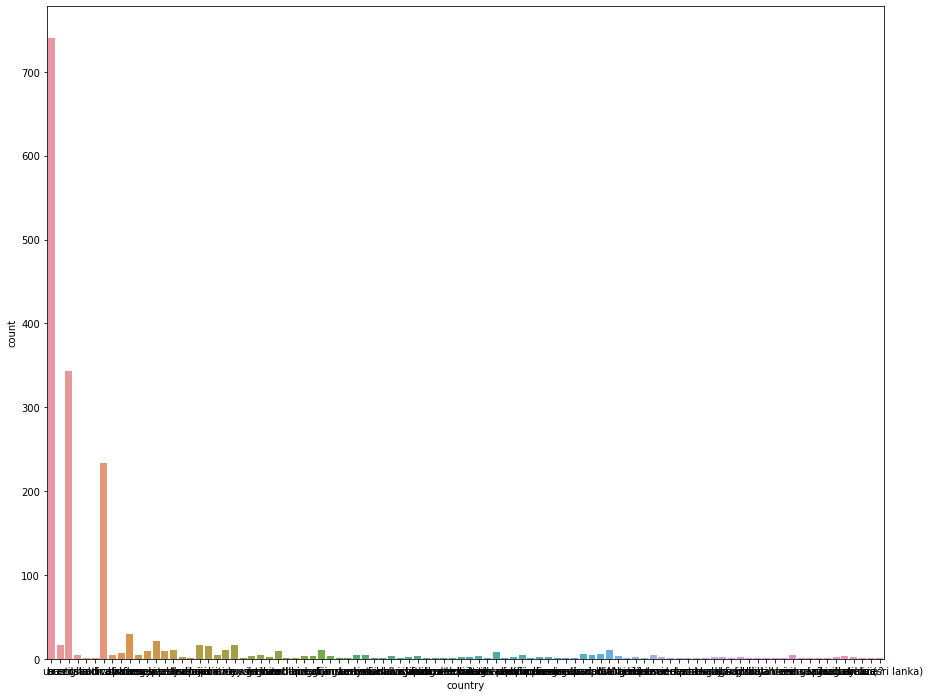

In [21]:
# En country no hay nulos
sns.countplot(x= 'country', data = df);

In [5]:
# No es fácil ver la información
#  Filtramos por los 10 países con más ataques
df10max = df.stb.freq(['country'], thresh = 87)
df10max

,country,count,percent,cumulative_count,cumulative_percent
0,usa,741,44.584838,741,44.584838
1,australia,343,20.637786,1084,65.222623
2,south africa,234,14.079422,1318,79.302046
3,bahamas,29,1.744886,1347,81.046931
4,new zealand,21,1.263538,1368,82.310469
5,reunion,17,1.022864,1385,83.333333
6,papua new guinea,16,0.962696,1401,84.296029
7,brazil,16,0.962696,1417,85.258724
8,mexico,15,0.902527,1432,86.161252
9,italy,11,0.661853,1443,86.823105


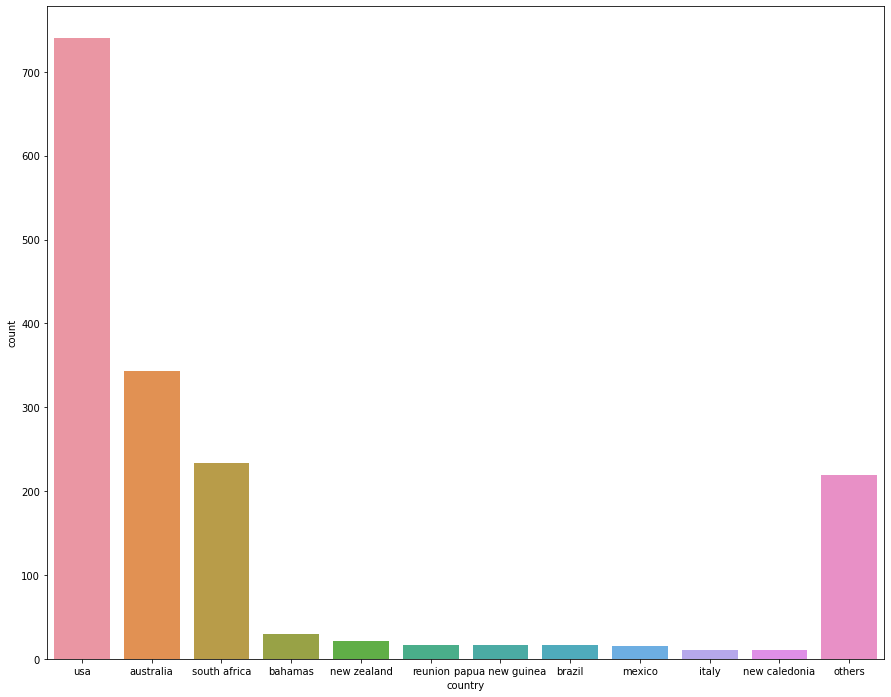

In [23]:
# Repetimos gráfica, ahora tiene que ser un barplot

sns.barplot(x='country', y='count', data=df10max);

> Vemos que los tres países en los que hay más ataques reportados son USA, Australia y South África, siendo en USA donde claramente hay más casos reportados

* Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?


In [10]:
# Volvemos a filtrar el dataframe, esta vez utilizaremos los nombres de los 10 mas frecuentes obtenidos en df10max
df10max['country'].values

array(['usa', 'australia', 'south africa', 'bahamas', 'new zealand',
       'reunion', 'papua new guinea', 'brazil', 'mexico', 'italy',
       'others'], dtype=object)

In [11]:
# Tenemos que retirar el 'others'
lista_paises = list(df10max['country'].values)
lista_paises.pop()

'others'

In [13]:
print(lista_paises)

['usa', 'australia', 'south africa', 'bahamas', 'new zealand', 'reunion', 'papua new guinea', 'brazil', 'mexico', 'italy']


In [14]:
df10 = df[df['country'].isin(lista_paises)]
# Comprobamos
df10['country'].unique()

array(['usa', 'brazil', 'australia', 'south africa', 'bahamas',
       'new zealand', 'reunion', 'mexico', 'italy', 'papua new guinea'],
      dtype=object)

In [16]:
df10.head(1)

,case_number,year,type,country,area,location,activity,name,age,time,species_,href,date,month,fatal_y/n,sex_m_f
0,2018.06.25,2018,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57.0,18h00,white shark,http://sharkattackfile.net/spreadsheets/pdf_di...,25-Jun-2018,Jun,N,F


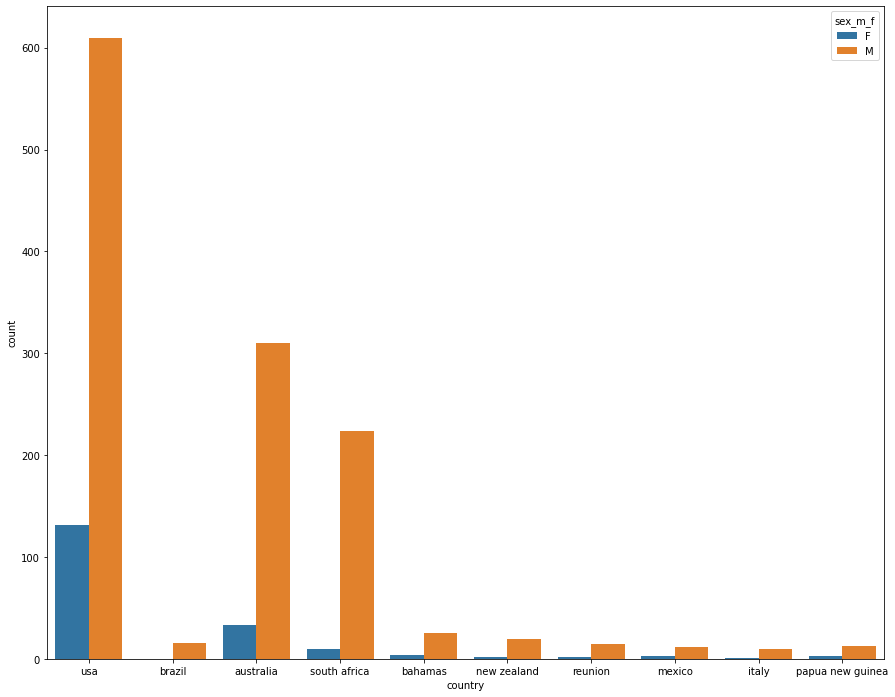

In [17]:
sns.countplot(x='country', data= df10, hue= 'sex_m_f');

> Vemos que sí hay mucho contraste entre el numero de casos entre hombres y mujeres.

* ¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.


* Ataques entre sexos, ¿hay diferencia?


* ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.